In [47]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
import xgboost as xgb


Training Data Size: 1956
Training Data Distribution:
CLASS
1    1005
0     951
Name: count, dtype: int64


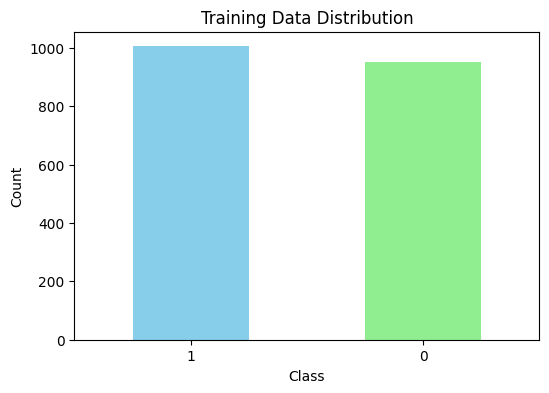

In [48]:
# Load your training dataset
file_path = '../dataset/youtube_spam.csv'
train_data = pd.read_csv(file_path)
train_texts = train_data['CONTENT']
train_labels = train_data['CLASS']

# Display training data size and distribution
print(f'Training Data Size: {len(train_data)}')
print('Training Data Distribution:')
print(train_labels.value_counts())

# Plot the distribution of classes in the training dataset
plt.figure(figsize=(6, 4))
train_labels.value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Data Distribution')
plt.xticks(rotation=0)
plt.show()

In [49]:



# Shuffle the dataset
train_data = train_data.sample(frac=1, random_state=42)

# Preprocessing function for text cleaning
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Stemming and Lemmatization functions
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize(text):
    # Apply stemming and lemmatization
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the dataset
train_texts = train_data['CONTENT'].apply(preprocess_text).apply(stem_and_lemmatize)
train_labels = train_data['CLASS']

# Split the data into training and test sets
X_train_texts, X_test_texts, y_train, y_test = train_test_split(train_texts, train_labels, test_size=0.2, random_state=42)

# Convert the text data into TF-IDF feature vectors, fitting only on the training data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train_texts)
X_test = tfidf_vectorizer.transform(X_test_texts)


Balanced Training Data Size: 1600
Balanced Training Data Distribution:
{0: 800, 1: 800}


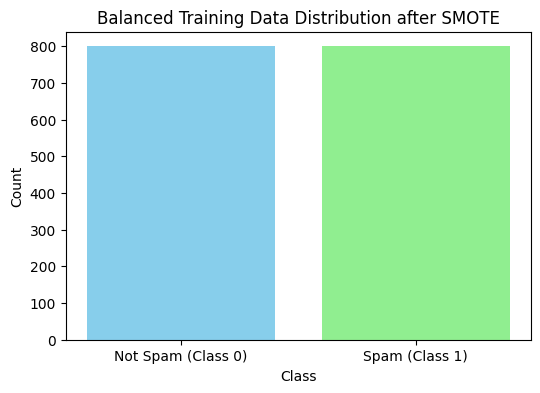

In [50]:

# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display balanced training data size and distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f'Balanced Training Data Size: {len(y_train)}')
print('Balanced Training Data Distribution:')
print(dict(zip(unique, counts)))


# Plot the distribution of classes in the balanced training dataset after SMOTE
plt.figure(figsize=(6, 4))
plt.bar(['Not Spam (Class 0)', 'Spam (Class 1)'], counts, color=['skyblue', 'lightgreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Training Data Distribution after SMOTE')
plt.xticks(rotation=0)
plt.show()

Evaluating with test size: 0.2
Training Naive Bayes...
Confusion Matrix for Naive Bayes with test size 0.2:
[[170  17]
 [ 32 173]]


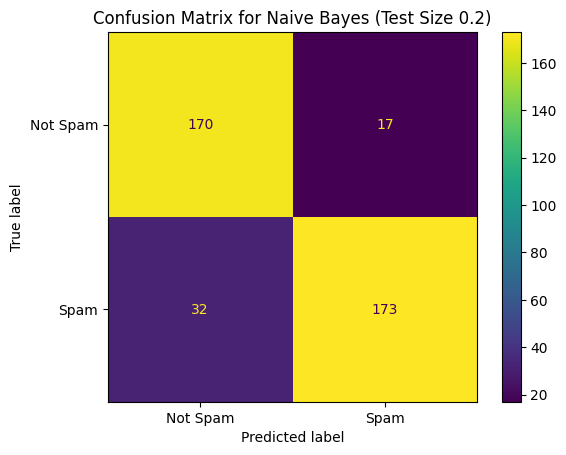

Specificity for Naive Bayes with test size 0.2: 0.91
Sensitivity (Recall) for Naive Bayes with test size 0.2: 0.84
Cross-Validation Scores: 0.82, 0.86, 0.82, 0.79, 0.85
Cross-Validation Accuracy: 0.83
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Training Random Forest...
Confusion Matrix for Random Forest with test size 0.2:
[[180   7]
 [ 33 172]]


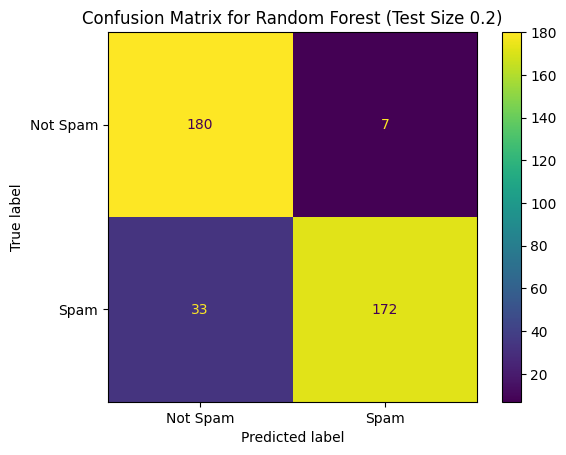

Specificity for Random Forest with test size 0.2: 0.96
Sensitivity (Recall) for Random Forest with test size 0.2: 0.84
Cross-Validation Scores: 0.87, 0.80, 0.90, 0.86, 0.90
Cross-Validation Accuracy: 0.86
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Training SVM (linear kernel)...
Confusion Matrix for SVM (linear kernel) with test size 0.2:
[[180   7]
 [ 29 176]]


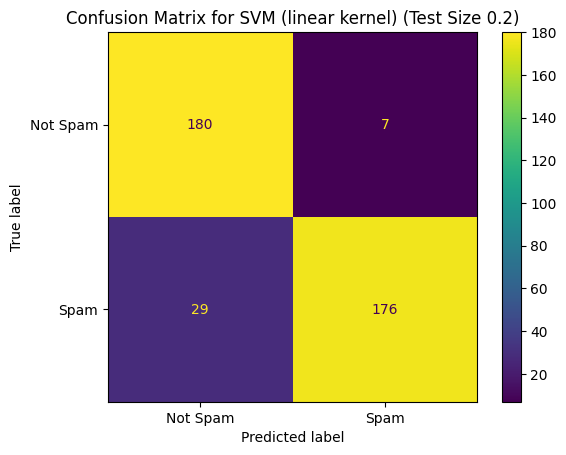

Specificity for SVM (linear kernel) with test size 0.2: 0.96
Sensitivity (Recall) for SVM (linear kernel) with test size 0.2: 0.86
Cross-Validation Scores: 0.87, 0.82, 0.86, 0.83, 0.87
Cross-Validation Accuracy: 0.85
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Training SVM (rbf kernel)...
Confusion Matrix for SVM (rbf kernel) with test size 0.2:
[[182   5]
 [ 30 175]]


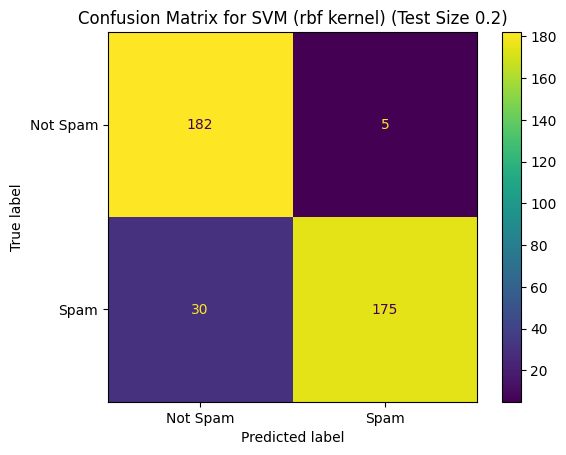

Specificity for SVM (rbf kernel) with test size 0.2: 0.97
Sensitivity (Recall) for SVM (rbf kernel) with test size 0.2: 0.85
Cross-Validation Scores: 0.85, 0.84, 0.81, 0.85, 0.87
Cross-Validation Accuracy: 0.84
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Training SVM (poly kernel)...
Confusion Matrix for SVM (poly kernel) with test size 0.2:
[[162  25]
 [ 22 183]]


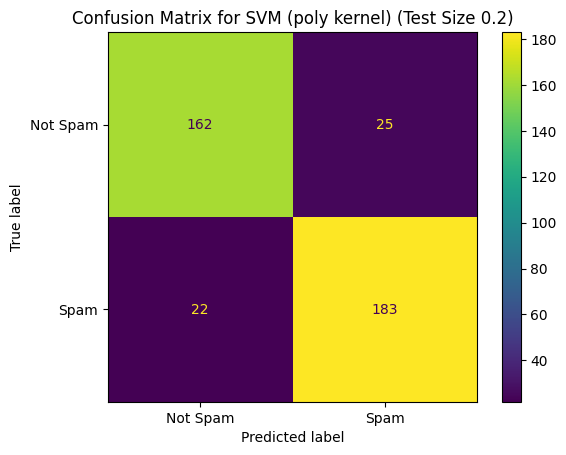

Specificity for SVM (poly kernel) with test size 0.2: 0.87
Sensitivity (Recall) for SVM (poly kernel) with test size 0.2: 0.89
Cross-Validation Scores: 0.81, 0.81, 0.83, 0.82, 0.82
Cross-Validation Accuracy: 0.82
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Training SVM (sigmoid kernel)...
Confusion Matrix for SVM (sigmoid kernel) with test size 0.2:
[[180   7]
 [ 34 171]]


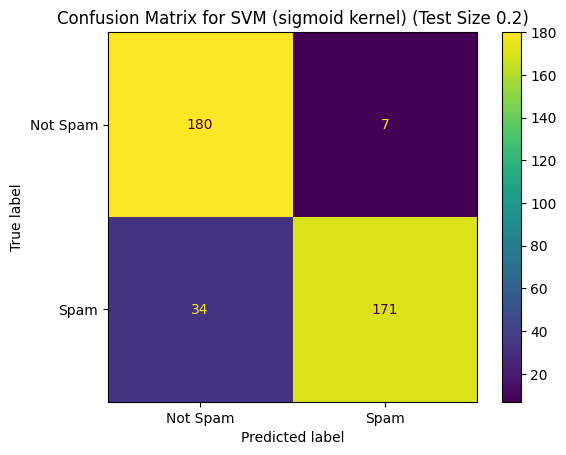

Specificity for SVM (sigmoid kernel) with test size 0.2: 0.96
Sensitivity (Recall) for SVM (sigmoid kernel) with test size 0.2: 0.83
Cross-Validation Scores: 0.87, 0.80, 0.86, 0.83, 0.86
Cross-Validation Accuracy: 0.84
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Training XGBoost...
Confusion Matrix for XGBoost with test size 0.2:
[[181   6]
 [ 38 167]]


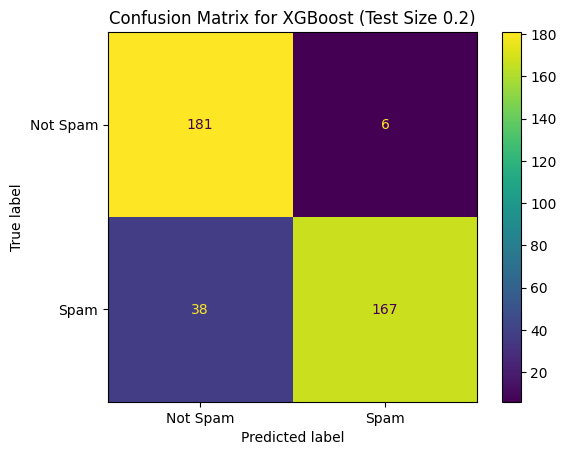

Specificity for XGBoost with test size 0.2: 0.97
Sensitivity (Recall) for XGBoost with test size 0.2: 0.81
Cross-Validation Scores: 0.91, 0.81, 0.87, 0.81, 0.86
Cross-Validation Accuracy: 0.85
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Evaluating with test size: 0.25
Training Naive Bayes...
Confusion Matrix for Naive Bayes with test size 0.25:
[[218  21]
 [ 37 213]]


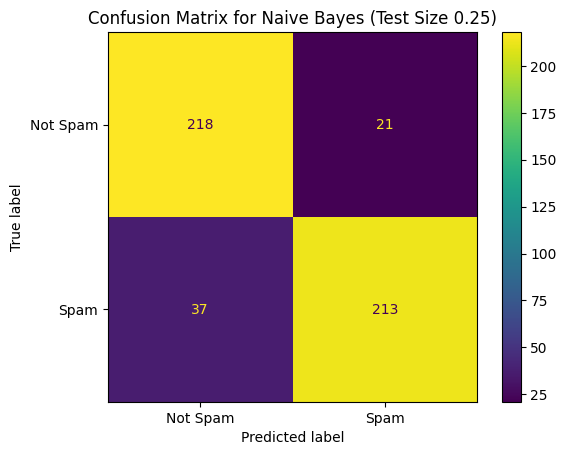

Specificity for Naive Bayes with test size 0.25: 0.91
Sensitivity (Recall) for Naive Bayes with test size 0.25: 0.85
Cross-Validation Scores: 0.83, 0.87, 0.88, 0.84, 0.87
Cross-Validation Accuracy: 0.85
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Training Random Forest...
Confusion Matrix for Random Forest with test size 0.25:
[[232   7]
 [ 39 211]]


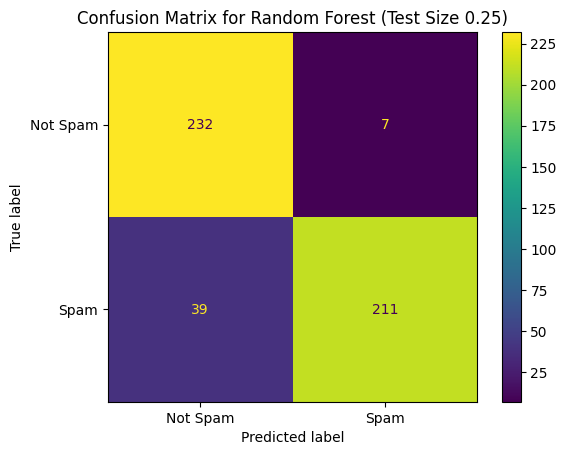

Specificity for Random Forest with test size 0.25: 0.97
Sensitivity (Recall) for Random Forest with test size 0.25: 0.84
Cross-Validation Scores: 0.88, 0.90, 0.87, 0.86, 0.87
Cross-Validation Accuracy: 0.87
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Training SVM (linear kernel)...
Confusion Matrix for SVM (linear kernel) with test size 0.25:
[[228  11]
 [ 37 213]]


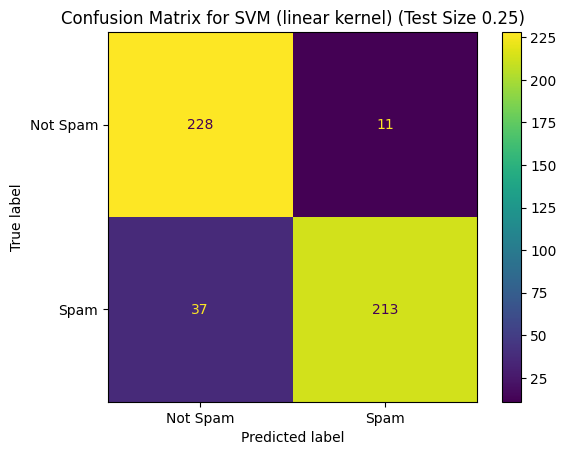

Specificity for SVM (linear kernel) with test size 0.25: 0.95
Sensitivity (Recall) for SVM (linear kernel) with test size 0.25: 0.85
Cross-Validation Scores: 0.89, 0.82, 0.87, 0.88, 0.87
Cross-Validation Accuracy: 0.86
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Training SVM (rbf kernel)...
Confusion Matrix for SVM (rbf kernel) with test size 0.25:
[[233   6]
 [ 38 212]]


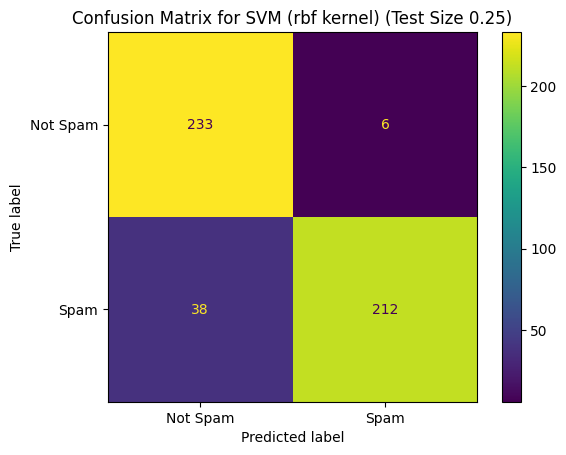

Specificity for SVM (rbf kernel) with test size 0.25: 0.97
Sensitivity (Recall) for SVM (rbf kernel) with test size 0.25: 0.85
Cross-Validation Scores: 0.87, 0.81, 0.85, 0.85, 0.86
Cross-Validation Accuracy: 0.84
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Training SVM (poly kernel)...
Confusion Matrix for SVM (poly kernel) with test size 0.25:
[[212  27]
 [ 28 222]]


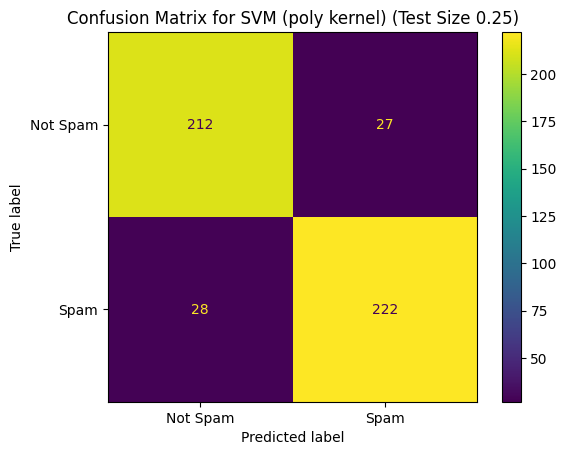

Specificity for SVM (poly kernel) with test size 0.25: 0.89
Sensitivity (Recall) for SVM (poly kernel) with test size 0.25: 0.89
Cross-Validation Scores: 0.85, 0.77, 0.86, 0.84, 0.80
Cross-Validation Accuracy: 0.82
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Training SVM (sigmoid kernel)...
Confusion Matrix for SVM (sigmoid kernel) with test size 0.25:
[[228  11]
 [ 44 206]]


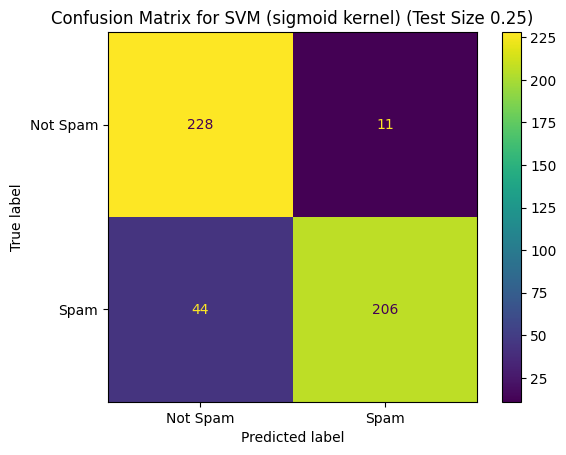

Specificity for SVM (sigmoid kernel) with test size 0.25: 0.95
Sensitivity (Recall) for SVM (sigmoid kernel) with test size 0.25: 0.82
Cross-Validation Scores: 0.88, 0.83, 0.86, 0.87, 0.86
Cross-Validation Accuracy: 0.86
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Training XGBoost...
Confusion Matrix for XGBoost with test size 0.25:
[[234   5]
 [ 46 204]]


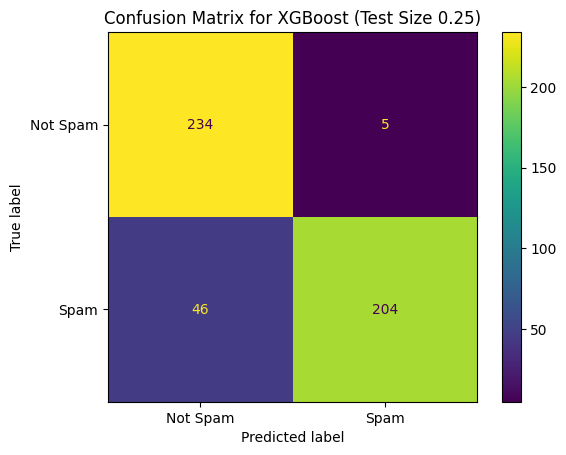

Specificity for XGBoost with test size 0.25: 0.98
Sensitivity (Recall) for XGBoost with test size 0.25: 0.82
Cross-Validation Scores: 0.92, 0.85, 0.87, 0.85, 0.82
Cross-Validation Accuracy: 0.86
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Evaluating with test size: 0.3
Training Naive Bayes...
Confusion Matrix for Naive Bayes with test size 0.3:
[[251  30]
 [ 46 260]]


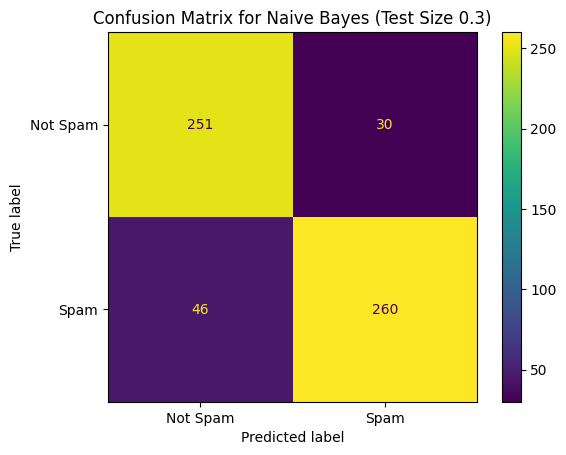

Specificity for Naive Bayes with test size 0.3: 0.89
Sensitivity (Recall) for Naive Bayes with test size 0.3: 0.85
Cross-Validation Scores: 0.86, 0.87, 0.82, 0.88, 0.84
Cross-Validation Accuracy: 0.85
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Training Random Forest...
Confusion Matrix for Random Forest with test size 0.3:
[[274   7]
 [ 51 255]]


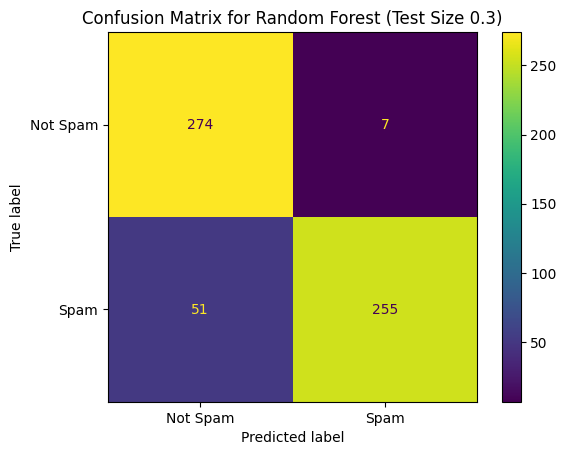

Specificity for Random Forest with test size 0.3: 0.98
Sensitivity (Recall) for Random Forest with test size 0.3: 0.83
Cross-Validation Scores: 0.90, 0.87, 0.84, 0.89, 0.89
Cross-Validation Accuracy: 0.88
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Training SVM (linear kernel)...
Confusion Matrix for SVM (linear kernel) with test size 0.3:
[[266  15]
 [ 48 258]]


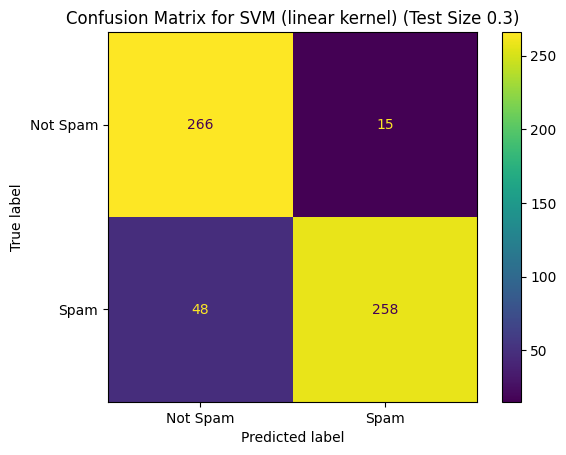

Specificity for SVM (linear kernel) with test size 0.3: 0.95
Sensitivity (Recall) for SVM (linear kernel) with test size 0.3: 0.84
Cross-Validation Scores: 0.91, 0.83, 0.87, 0.87, 0.85
Cross-Validation Accuracy: 0.87
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Training SVM (rbf kernel)...
Confusion Matrix for SVM (rbf kernel) with test size 0.3:
[[274   7]
 [ 49 257]]


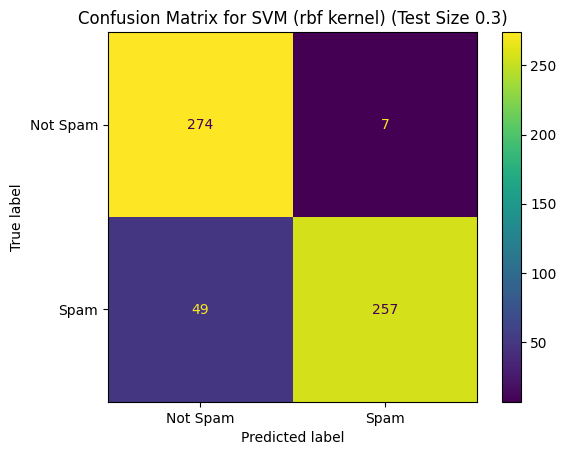

Specificity for SVM (rbf kernel) with test size 0.3: 0.98
Sensitivity (Recall) for SVM (rbf kernel) with test size 0.3: 0.84
Cross-Validation Scores: 0.86, 0.85, 0.86, 0.91, 0.91
Cross-Validation Accuracy: 0.88
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Training SVM (poly kernel)...
Confusion Matrix for SVM (poly kernel) with test size 0.3:
[[251  30]
 [ 34 272]]


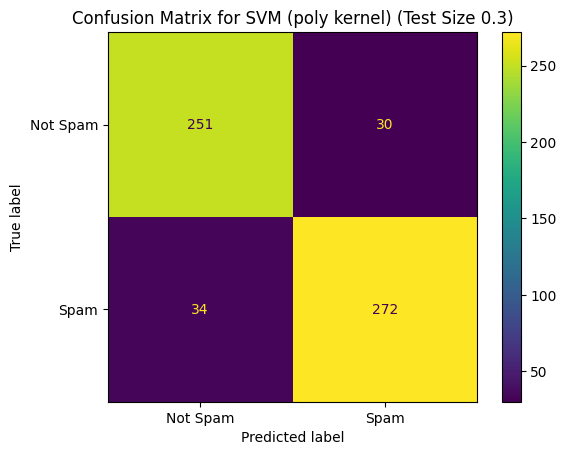

Specificity for SVM (poly kernel) with test size 0.3: 0.89
Sensitivity (Recall) for SVM (poly kernel) with test size 0.3: 0.89
Cross-Validation Scores: 0.81, 0.83, 0.79, 0.88, 0.88
Cross-Validation Accuracy: 0.84
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Training SVM (sigmoid kernel)...
Confusion Matrix for SVM (sigmoid kernel) with test size 0.3:
[[266  15]
 [ 54 252]]


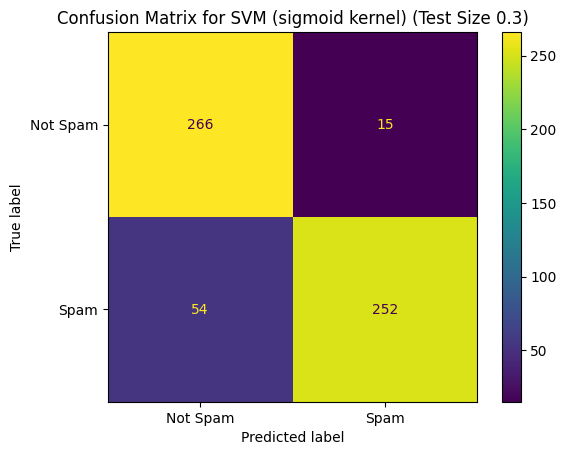

Specificity for SVM (sigmoid kernel) with test size 0.3: 0.95
Sensitivity (Recall) for SVM (sigmoid kernel) with test size 0.3: 0.82
Cross-Validation Scores: 0.90, 0.84, 0.86, 0.86, 0.86
Cross-Validation Accuracy: 0.87
Precision: 0.89
Recall: 0.88
F1 Score: 0.88
Training XGBoost...
Confusion Matrix for XGBoost with test size 0.3:
[[272   9]
 [ 63 243]]


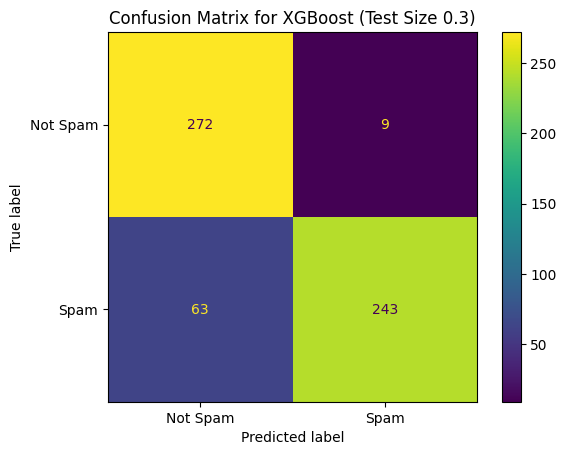

Specificity for XGBoost with test size 0.3: 0.97
Sensitivity (Recall) for XGBoost with test size 0.3: 0.79
Cross-Validation Scores: 0.92, 0.84, 0.85, 0.86, 0.86
Cross-Validation Accuracy: 0.87
Precision: 0.89
Recall: 0.88
F1 Score: 0.88
Evaluating with test size: 0.35
Training Naive Bayes...
Confusion Matrix for Naive Bayes with test size 0.35:
[[297  34]
 [ 52 302]]


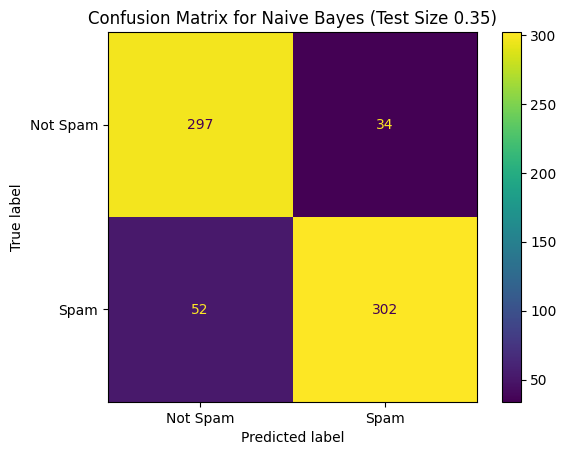

Specificity for Naive Bayes with test size 0.35: 0.90
Sensitivity (Recall) for Naive Bayes with test size 0.35: 0.85
Cross-Validation Scores: 0.88, 0.85, 0.82, 0.87, 0.89
Cross-Validation Accuracy: 0.86
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
Training Random Forest...
Confusion Matrix for Random Forest with test size 0.35:
[[324   7]
 [ 66 288]]


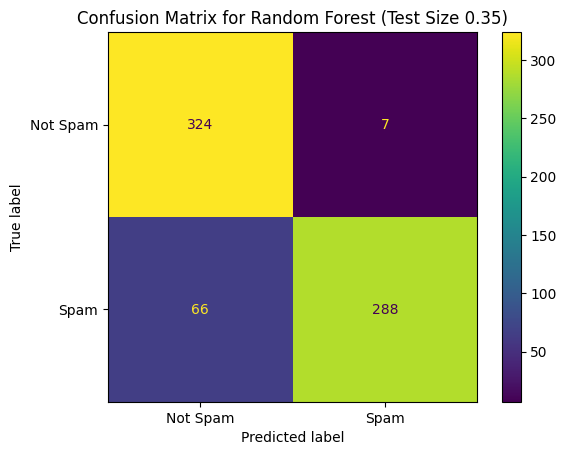

Specificity for Random Forest with test size 0.35: 0.98
Sensitivity (Recall) for Random Forest with test size 0.35: 0.81
Cross-Validation Scores: 0.89, 0.87, 0.88, 0.88, 0.91
Cross-Validation Accuracy: 0.88
Precision: 0.91
Recall: 0.89
F1 Score: 0.89
Training SVM (linear kernel)...
Confusion Matrix for SVM (linear kernel) with test size 0.35:
[[315  16]
 [ 56 298]]


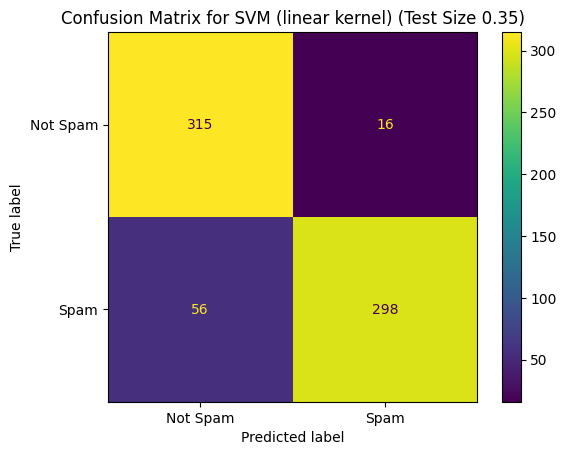

Specificity for SVM (linear kernel) with test size 0.35: 0.95
Sensitivity (Recall) for SVM (linear kernel) with test size 0.35: 0.84
Cross-Validation Scores: 0.90, 0.88, 0.88, 0.88, 0.86
Cross-Validation Accuracy: 0.88
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Training SVM (rbf kernel)...
Confusion Matrix for SVM (rbf kernel) with test size 0.35:
[[322   9]
 [ 59 295]]


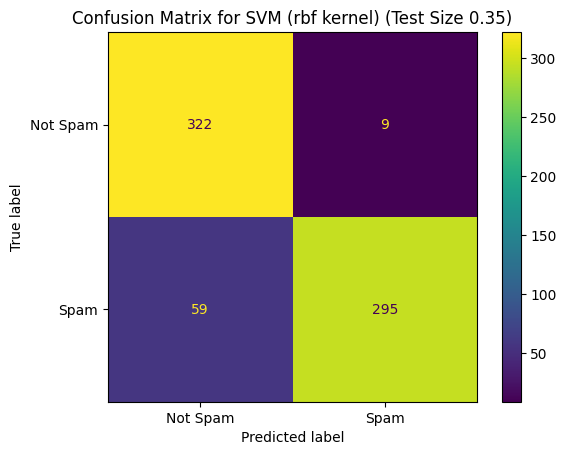

Specificity for SVM (rbf kernel) with test size 0.35: 0.97
Sensitivity (Recall) for SVM (rbf kernel) with test size 0.35: 0.83
Cross-Validation Scores: 0.88, 0.88, 0.87, 0.92, 0.91
Cross-Validation Accuracy: 0.89
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Training SVM (poly kernel)...
Confusion Matrix for SVM (poly kernel) with test size 0.35:
[[288  43]
 [ 36 318]]


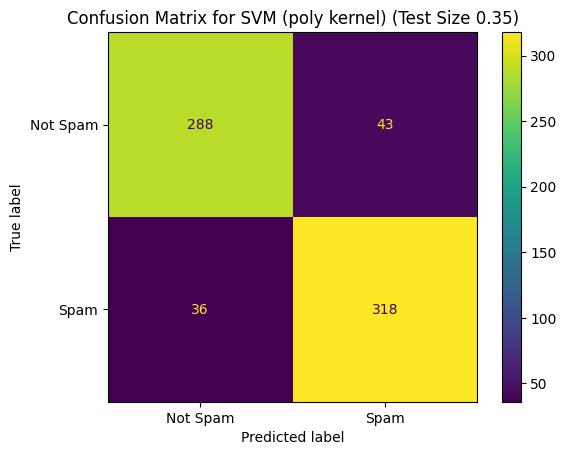

Specificity for SVM (poly kernel) with test size 0.35: 0.87
Sensitivity (Recall) for SVM (poly kernel) with test size 0.35: 0.90
Cross-Validation Scores: 0.86, 0.80, 0.88, 0.88, 0.85
Cross-Validation Accuracy: 0.85
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Training SVM (sigmoid kernel)...
Confusion Matrix for SVM (sigmoid kernel) with test size 0.35:
[[313  18]
 [ 62 292]]


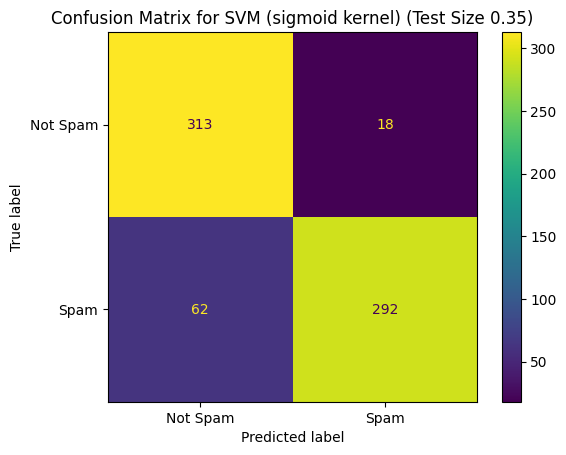

Specificity for SVM (sigmoid kernel) with test size 0.35: 0.95
Sensitivity (Recall) for SVM (sigmoid kernel) with test size 0.35: 0.82
Cross-Validation Scores: 0.90, 0.88, 0.86, 0.87, 0.85
Cross-Validation Accuracy: 0.87
Precision: 0.89
Recall: 0.88
F1 Score: 0.88
Training XGBoost...
Confusion Matrix for XGBoost with test size 0.35:
[[316  15]
 [ 76 278]]


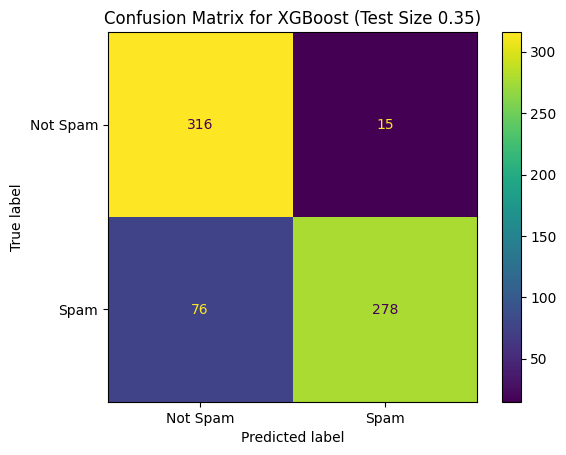

Specificity for XGBoost with test size 0.35: 0.95
Sensitivity (Recall) for XGBoost with test size 0.35: 0.79
Cross-Validation Scores: 0.88, 0.84, 0.85, 0.87, 0.82
Cross-Validation Accuracy: 0.85
Precision: 0.88
Recall: 0.87
F1 Score: 0.87


In [ ]:
for test_size in test_sizes:
    print(f'Evaluating with test size: {test_size}')
    
    # Split the original dataset into different training and test sets
    X_train_texts, X_test_texts, y_train, y_test = train_test_split(train_texts, train_labels, test_size=test_size, random_state=42)
    
    # Convert the text data into TF-IDF feature vectors
    X_train = tfidf_vectorizer.fit_transform(X_train_texts)
    X_test = tfidf_vectorizer.transform(X_test_texts)
    
    # Apply SMOTE on training data only
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    for model_name, model in models.items():
        print(f'Training {model_name}...')
        model.fit(X_train, y_train)
        
        # Cross-validation on the test set
        cross_val_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
        test_accuracy = cross_val_scores.mean()
        
        # Collect cross-validation scores for output
        cross_val_scores_str = ', '.join([f'{score:.2f}' for score in cross_val_scores])
        
         # Load and preprocess the new test dataset
        test_dataset_path = '..a/youtube_comments_i6IOiUi6IYY.xlsx'
        test_data = pd.read_excel(test_dataset_path)
        test_comments = test_data['Comment'].apply(text_preprocessing).apply(stem_and_lemmatize)
        X_test_new = tfidf_vectorizer.transform(test_comments)

        # Predict using the trained model on the new test set
        y_test_predictions = best_model.predict(X_test_new)
        y_test_probabilities = best_model.predict_proba(X_test_new)[:, 1]  # Probability for class 1 (Spam)


        # # Predict using the trained model on the test set
        # y_test_predictions = model.predict(X_test)
        # y_test_probabilities = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (Spam)

        # Display confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_predictions)
        print(f'Confusion Matrix for {model_name} with test size {test_size}:')
        print(conf_matrix)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Spam', 'Spam'])
        disp.plot()
        plt.title(f'Confusion Matrix for {model_name} (Test Size {test_size})')
        plt.show()

        # Calculate confusion matrix metrics
        tn, fp, fn, tp = conf_matrix.ravel()
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        print(f'Specificity for {model_name} with test size {test_size}: {specificity:.2f}')
        print(f'Sensitivity (Recall) for {model_name} with test size {test_size}: {sensitivity:.2f}')
        
        # Evaluate the model performance
        test_precision = precision_score(y_test, y_test_predictions, average='weighted')
        test_recall = recall_score(y_test, y_test_predictions, average='weighted')
        test_f1 = f1_score(y_test, y_test_predictions, average='weighted')
        
        results.append({
            'Model': model_name,
            'Test Size': test_size,
            'Accuracy': test_accuracy,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1 Score': test_f1,
            'Cross-Validation Scores': cross_val_scores_str
        })
        
        print(f'Cross-Validation Scores: {cross_val_scores_str}')
        print(f'Cross-Validation Accuracy: {test_accuracy:.2f}')
        print(f'Precision: {test_precision:.2f}')
        print(f'Recall: {test_recall:.2f}')
        print(f'F1 Score: {test_f1:.2f}')

In [52]:

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)
# Save results to an Excel or CSV file
results_df.to_excel('model_evaluation_results.xlsx', index=False)
results_df.to_csv('model_evaluation_results.csv', index=False)


                    Model  Test Size  Accuracy  Precision    Recall  F1 Score  \
0             Naive Bayes       0.20  0.829017   0.877638  0.875000  0.875037   
1           Random Forest       0.20  0.864946   0.905641  0.897959  0.897821   
2     SVM (linear kernel)       0.20  0.852061   0.913804  0.908163  0.908111   
3        SVM (rbf kernel)       0.20  0.841837   0.917968  0.910714  0.910613   
4       SVM (poly kernel)       0.20  0.818922   0.880107  0.880102  0.880053   
..                    ...        ...       ...        ...       ...       ...   
107   SVM (linear kernel)       0.35  0.878832   0.900729  0.894891  0.894738   
108      SVM (rbf kernel)       0.35  0.893431   0.909872  0.900730  0.900444   
109     SVM (poly kernel)       0.35  0.854015   0.884753  0.884672  0.884620   
110  SVM (sigmoid kernel)       0.35  0.871533   0.890102  0.883212  0.882981   
111               XGBoost       0.35  0.854015   0.879859  0.867153  0.866495   

          Cross-Validation 

In [53]:
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("Best Model based on Accuracy:")
print(best_accuracy_model)

best_f1_score_model = results_df.loc[results_df['F1 Score'].idxmax()]
print("Best Model based on F1 Score:")
print(best_f1_score_model)

Best Model based on Accuracy:
Model                                  SVM (rbf kernel)
Test Size                                          0.35
Accuracy                                       0.893431
Precision                                      0.909872
Recall                                          0.90073
F1 Score                                       0.900444
Cross-Validation Scores    0.88, 0.88, 0.87, 0.92, 0.91
Name: 24, dtype: object
Best Model based on F1 Score:
Model                                  SVM (rbf kernel)
Test Size                                           0.2
Accuracy                                       0.841837
Precision                                      0.917968
Recall                                         0.910714
F1 Score                                       0.910613
Cross-Validation Scores    0.85, 0.84, 0.81, 0.85, 0.87
Name: 3, dtype: object


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (16,).

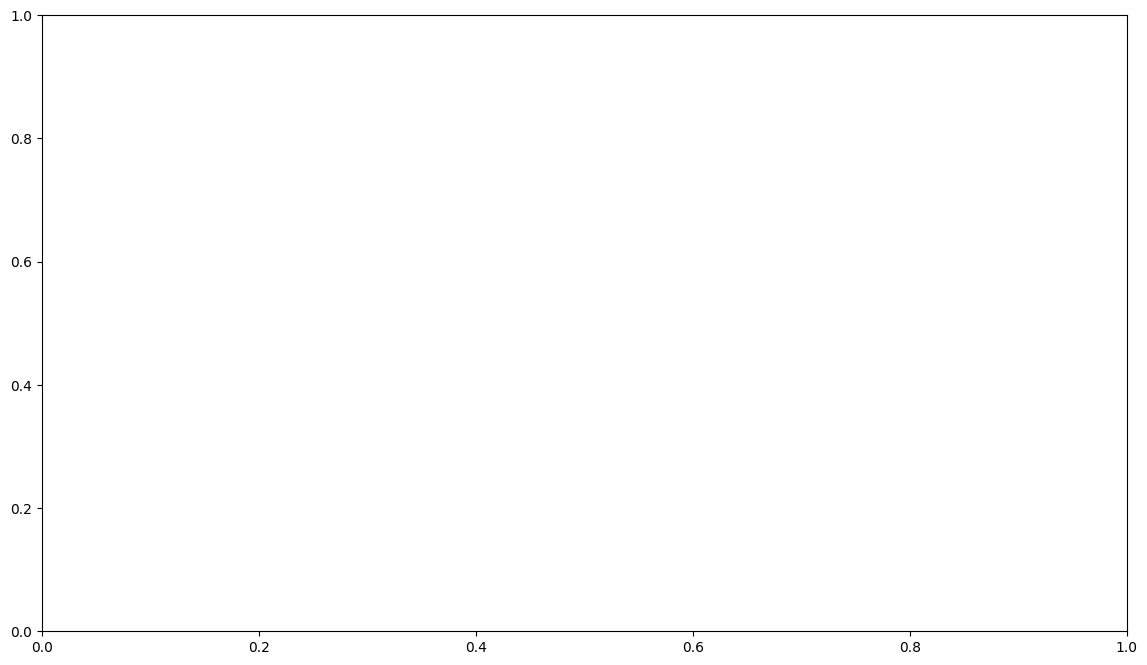

In [54]:

# Visualization of the comparison using column chart
plt.figure(figsize=(14, 8))
width = 0.15
x = np.arange(len(results_df['Test Size'].unique()))

for i, model_name in enumerate(results_df['Model'].unique()):
    model_results = results_df[results_df['Model'] == model_name]
    plt.bar(x + i * width, model_results['Accuracy'], width, label=f'{model_name} (Accuracy)')

plt.xticks(ticks=x + width * (len(models) / 2 - 1), labels=results_df['Test Size'].unique())
plt.xlabel('Test Sizes = [0.2, 0.25, 0.3, 0.35]')
plt.ylabel('Accuracy')
plt.title('Model Performance Metrics for Different Test Sizes (Column Chart)')
plt.legend()
plt.grid(axis='y')
plt.show()


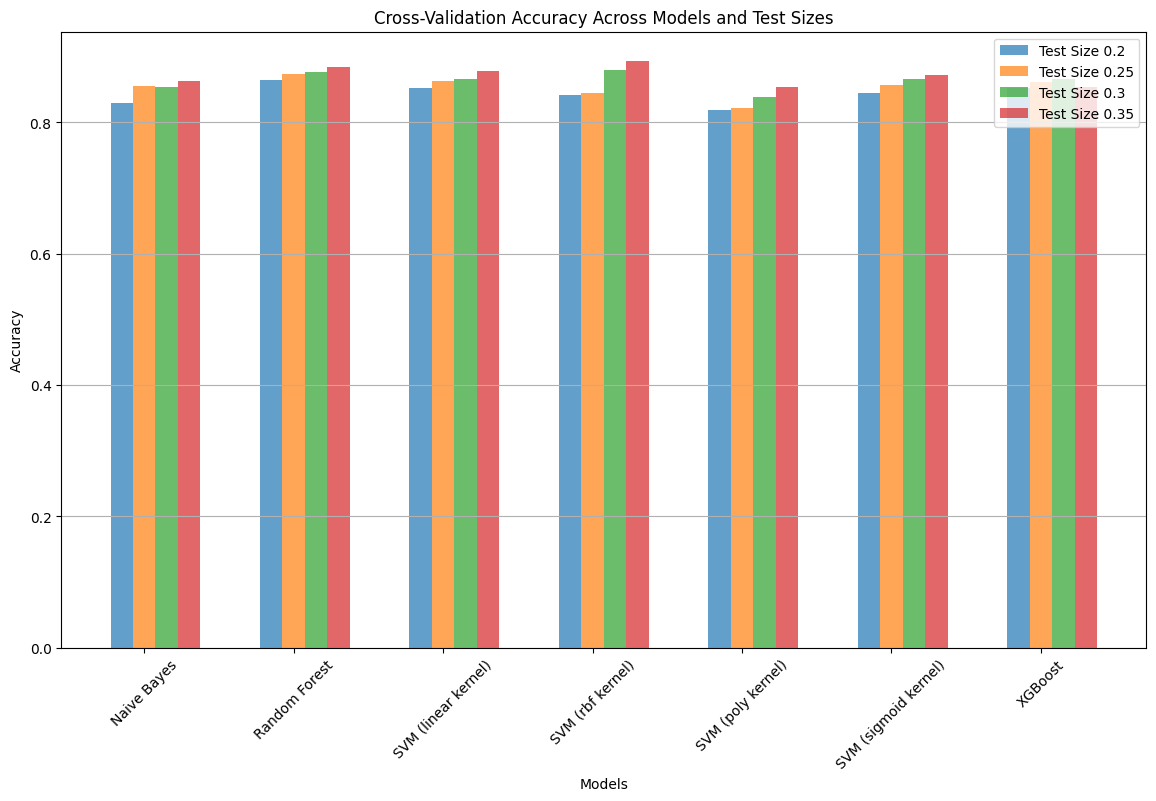

In [17]:
# Visualization of Cross-Validation Results Across Models
plt.figure(figsize=(14, 8))
width = 0.15
x = np.arange(len(results_df['Model'].unique()))

for i, test_size in enumerate(results_df['Test Size'].unique()):
    test_size_results = results_df[results_df['Test Size'] == test_size]
    plt.bar(x + i * width, test_size_results['Accuracy'], width, label=f'Test Size {test_size}', alpha=0.7)

plt.xticks(ticks=x + width * (len(test_sizes) / 2 - 1), labels=results_df['Model'].unique(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Across Models and Test Sizes')
plt.legend()
plt.grid(axis='y')
plt.show()


                   Model  Test Size  Accuracy  Precision    Recall  F1 Score  \
0            Naive Bayes       0.20  0.829017   0.877638  0.875000  0.875037   
1          Random Forest       0.20  0.864946   0.905641  0.897959  0.897821   
2    SVM (linear kernel)       0.20  0.852061   0.913804  0.908163  0.908111   
3       SVM (rbf kernel)       0.20  0.841837   0.917968  0.910714  0.910613   
4      SVM (poly kernel)       0.20  0.818922   0.880107  0.880102  0.880053   
5   SVM (sigmoid kernel)       0.20  0.844434   0.903643  0.895408  0.895243   
6                XGBoost       0.20  0.851996   0.899088  0.887755  0.887427   
7            Naive Bayes       0.25  0.854829   0.883202  0.881391  0.881351   
8          Random Forest       0.25  0.873196   0.913247  0.905930  0.905666   
9    SVM (linear kernel)       0.25  0.862992   0.906653  0.901840  0.901680   
10      SVM (rbf kernel)       0.25  0.844603   0.917395  0.910020  0.909767   
11     SVM (poly kernel)       0.25  0.8

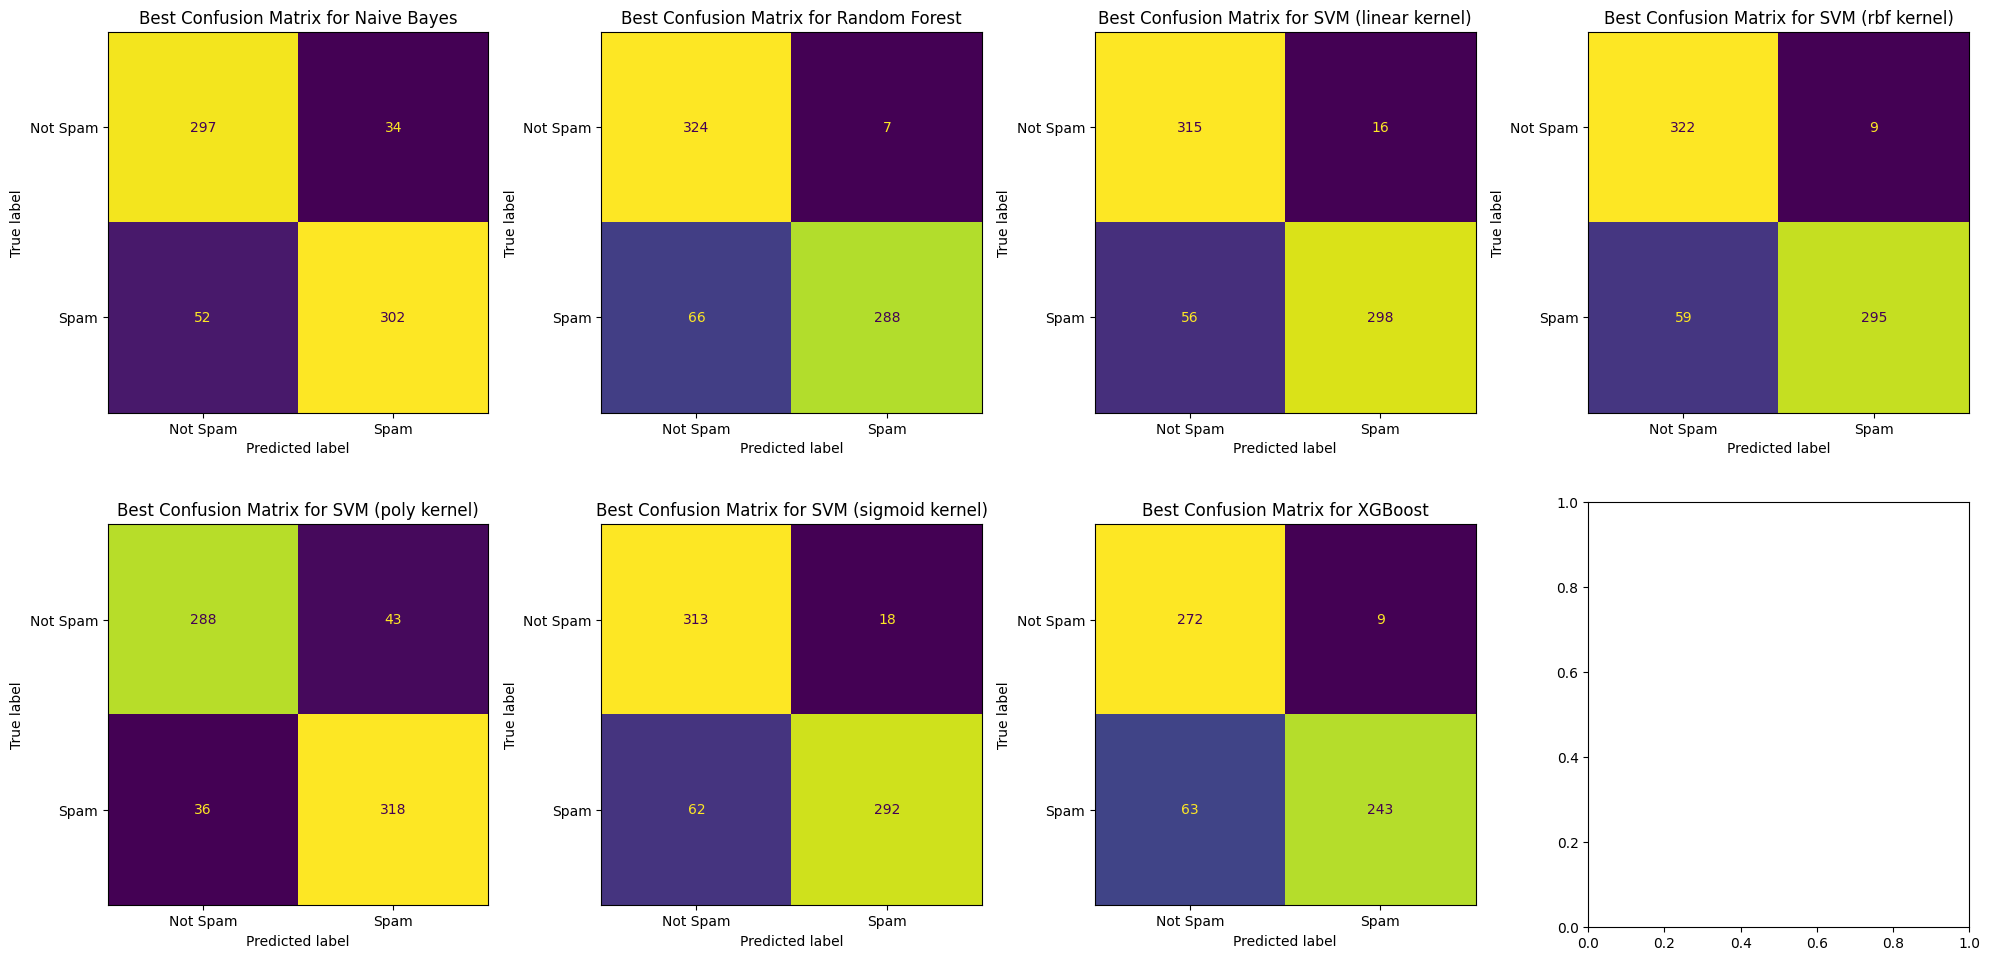

In [23]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Find the best confusion matrix per model and display them in one figure
best_conf_matrices = {}
for model_name in results_df['Model'].unique():
    model_results = results_df[results_df['Model'] == model_name]
    best_result = model_results.loc[model_results['Accuracy'].idxmax()]
    best_test_size = best_result['Test Size']
    
    # Split data again to get the best configuration
    X_train_texts, X_test_texts, y_train, y_test = train_test_split(train_texts, train_labels, test_size=best_test_size, random_state=42)
    X_train = tfidf_vectorizer.fit_transform(X_train_texts)
    X_test = tfidf_vectorizer.transform(X_test_texts)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = models[model_name]
    model.fit(X_train, y_train)
    y_test_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_test_predictions)
    best_conf_matrices[model_name] = conf_matrix

# Plot all best confusion matrices in one figure
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, (model_name, conf_matrix) in enumerate(best_conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Spam', 'Spam'])
    disp.plot(ax=axes[idx], colorbar=False)
    axes[idx].set_title(f'Best Confusion Matrix for {model_name}')

plt.tight_layout()
plt.show()


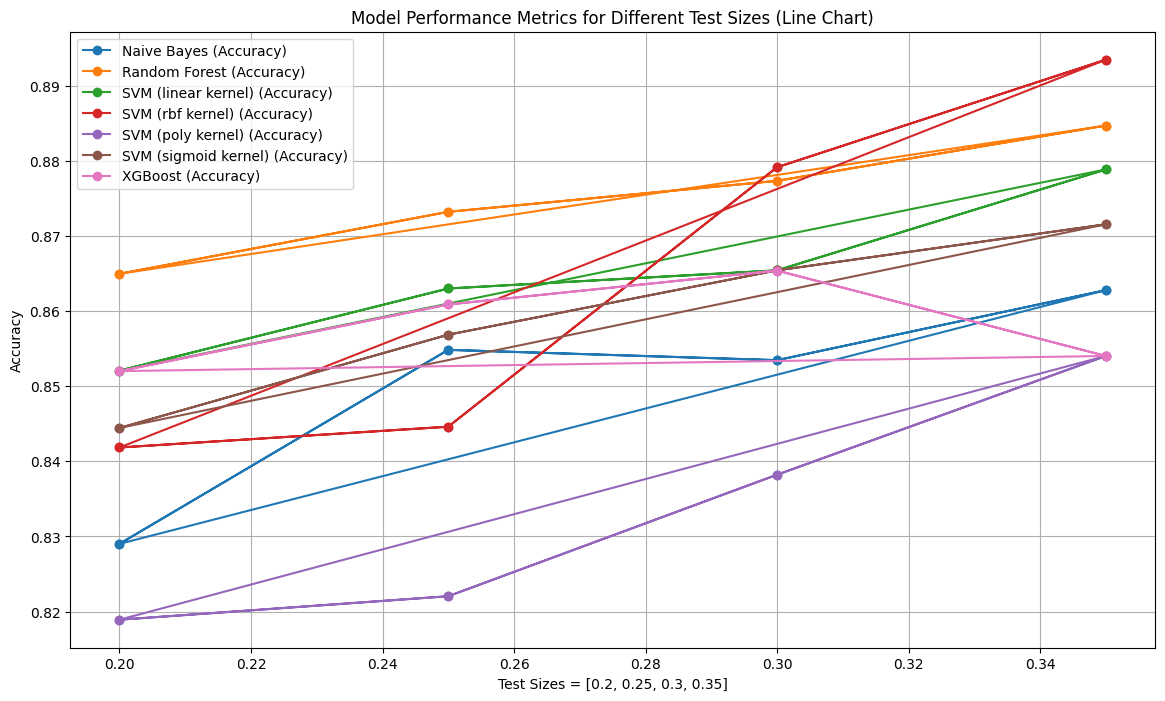

In [31]:

# Visualization of the comparison using line chart
plt.figure(figsize=(14, 8))
for model_name in results_df['Model'].unique():
    model_results = results_df[results_df['Model'] == model_name]
    plt.plot(model_results['Test Size'], model_results['Accuracy'], marker='o', label=f'{model_name} (Accuracy)')

plt.xlabel('Test Sizes = [0.2, 0.25, 0.3, 0.35]')
plt.ylabel('Accuracy')
plt.title('Model Performance Metrics for Different Test Sizes (Line Chart)')
plt.legend()
plt.grid()
plt.show()


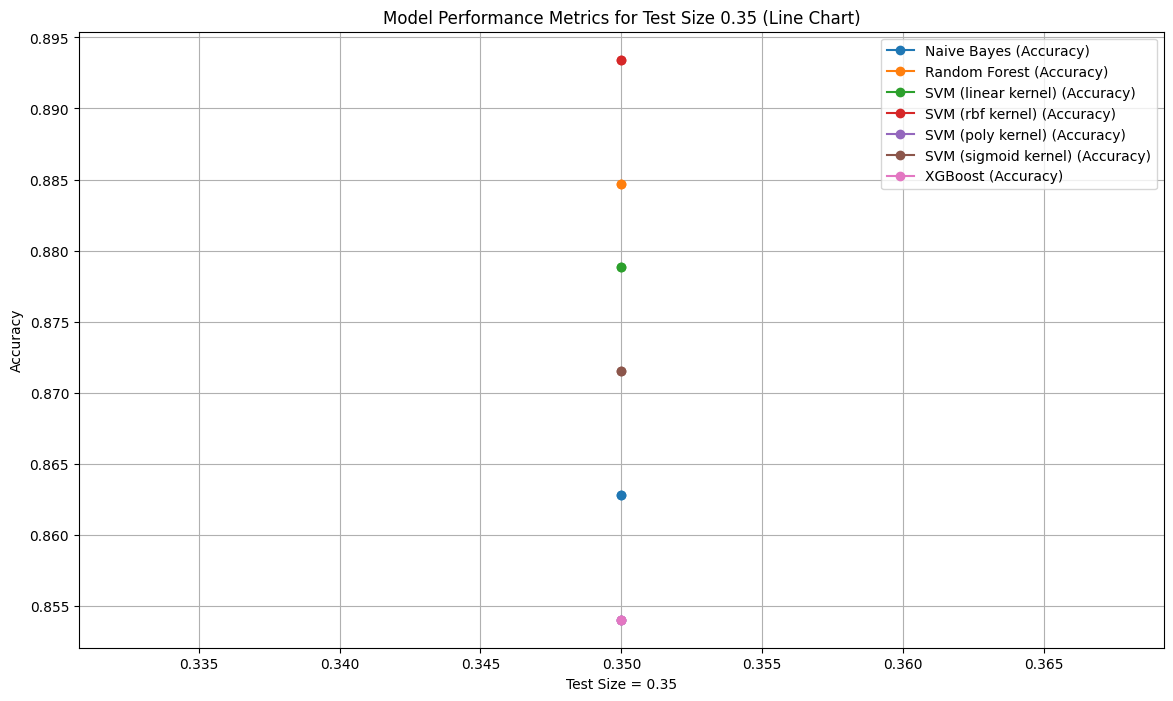

In [34]:
# Visualization of the comparison using line chart for test size 0.35
plt.figure(figsize=(14, 8))
for model_name in results_df['Model'].unique():
    model_results = results_df[(results_df['Model'] == model_name) & (results_df['Test Size'] == 0.35)]
    plt.plot(model_results['Test Size'], model_results['Accuracy'], marker='o', label=f'{model_name} (Accuracy)')

plt.xlabel('Test Size = 0.35')
plt.ylabel('Accuracy')
plt.title('Model Performance Metrics for Test Size 0.35 (Line Chart)')
plt.legend()
plt.grid()
plt.show()

KeyError: 'Confusion Matrix'

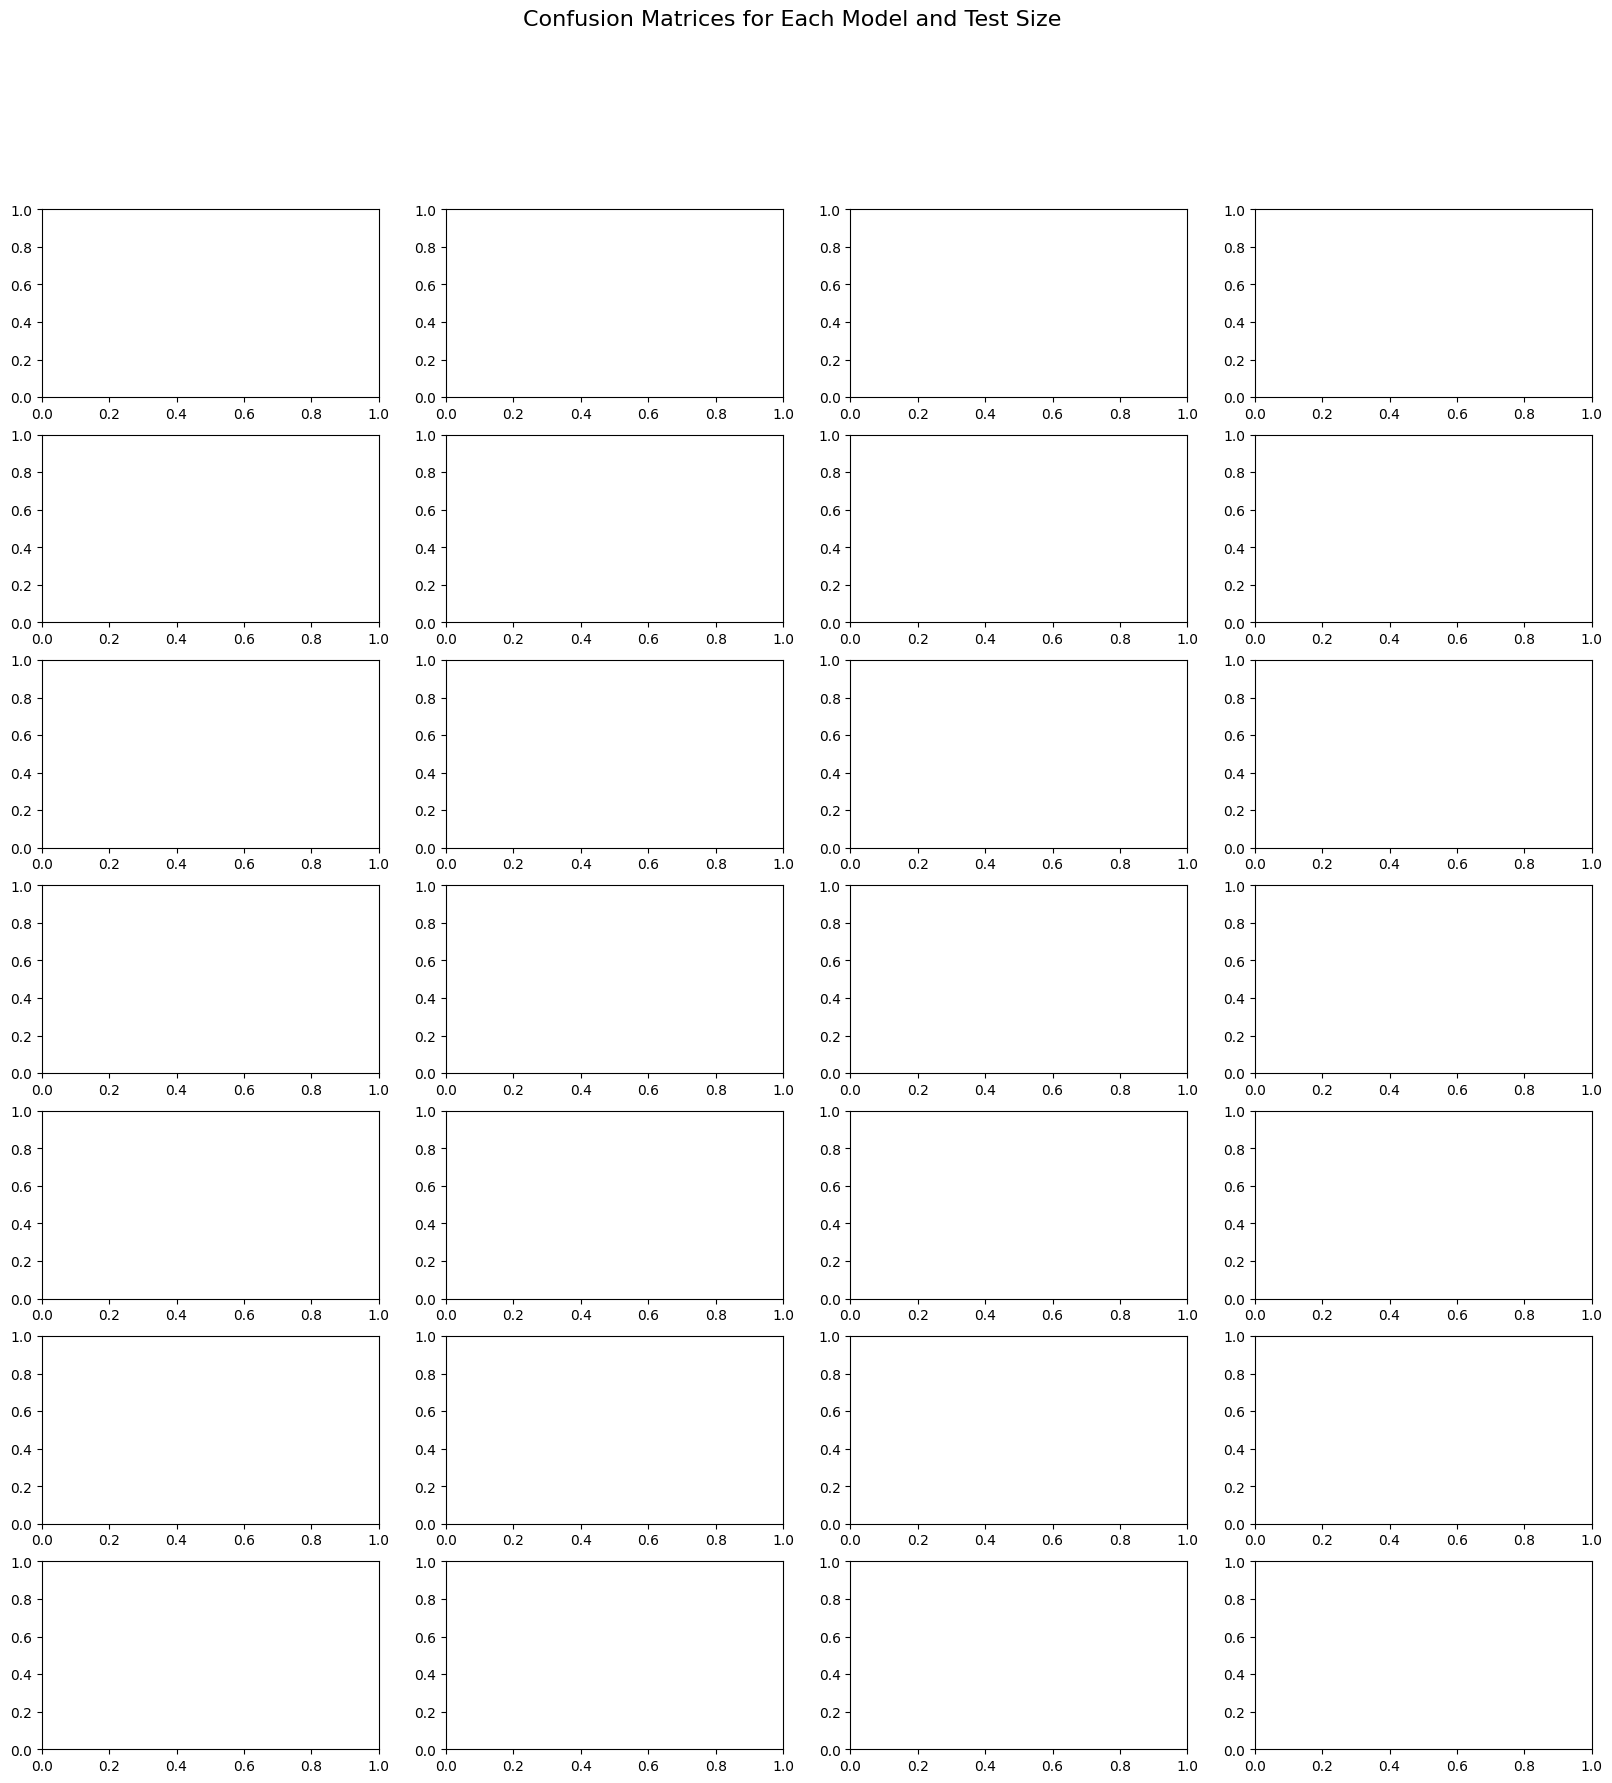

In [35]:

# Visualization of Confusion Matrices Across Models and Test Sizes
fig, axes = plt.subplots(len(models), len(test_sizes), figsize=(20, 20))
fig.suptitle('Confusion Matrices for Each Model and Test Size', fontsize=16)

for i, model_name in enumerate(results_df['Model'].unique()):
    for j, test_size in enumerate(test_sizes):
        ax = axes[i, j]
        cm = results_df[(results_df['Model'] == model_name) & (results_df['Test Size'] == test_size)]['Confusion Matrix'].values[0]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
        disp.plot(ax=ax, colorbar=False)
        ax.set_title(f'{model_name} (Test Size {test_size})')
        if j == 0:
            ax.set_ylabel('Actual')
        if i == len(models) - 1:
            ax.set_xlabel('Predicted')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (14,).

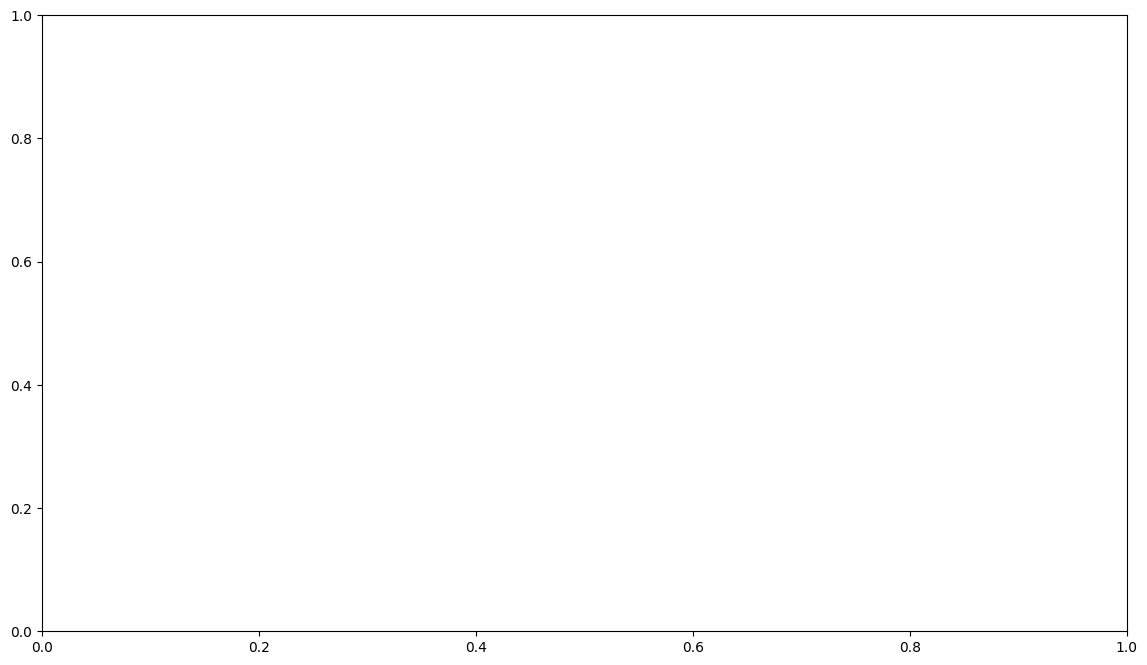

In [30]:

# Visualization of Cross-Validation Results Across Models
plt.figure(figsize=(14, 8))
width = 0.15
x = np.arange(len(results_df['Model'].unique()))

for i, test_size in enumerate(results_df['Test Size'].unique()):
    test_size_results = results_df[results_df['Test Size'] == test_size]
    plt.bar(x + i * width, test_size_results['Accuracy'], width, label=f'Test Size {test_size}', alpha=0.7)

plt.xticks(ticks=x + width * (len(test_sizes) / 2 - 1), labels=results_df['Model'].unique(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Across Models and Test Sizes')
plt.legend()
plt.grid(axis='y')
plt.show()